#### NAME: GALIWANGO CHARLES JOVANS 
#### REGNO: J24M19/002

PART A

DATASET DESCRIPTION [Landslide_Factors_IRAN.csv]()

This dataset includes information and factors affecting landslides in Iran. The dataset contains over `4,000 landslide hazards in Iran`, each of which has been characterized by a variety of factors that may contribute to landslideoccurrence. These factors include natural factors such as slope, climate, tectonic activity, etc., and human factors such as land use, etc. These factors can have a significant impact on the likelihood of a landslide occurring. For example, `slope is one of the most important natural factors affecting landslides`. Note that landslides are more likely to occur on steep slopes.<BR>
1. Use the dataset to generate various insights on landslide occurrences in Iran.
Generate and publish your results in a python notebook on your Kaggle or
`Github account.`

Importing the required python libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Milestone One

* Importing and reading the dataset into the notebook

In [3]:
data = pd.read_csv("Landslide_Factors_IRAN.csv",na_values=[' ']) 

* Understanding the data types in the dataset

In [4]:
data.dtypes

ID                   int64
LONG               float64
LAT                float64
SUB_Basin           object
Elevation          float64
AAP(mm)              int64
RiverDIST(m)       float64
FaultDIST(m)       float64
Landuse_Type        object
Slop(Percent)      float64
Slop(Degrees)      float64
GEO_UNIT            object
DES_GEOUNI          object
Climate_Type        object
DES_ClimateType     object
dtype: object

>these are the data types present in the dataset int64  float64  object

### Data cleaning & wrangling tasks 
#### Missing values
* Checking for missing values in the dataset

In [5]:
missing_values = data.isnull().sum()
print(missing_values)

ID                  0
LONG                0
LAT                 0
SUB_Basin           1
Elevation           0
AAP(mm)             0
RiverDIST(m)        0
FaultDIST(m)        0
Landuse_Type        4
Slop(Percent)       0
Slop(Degrees)       0
GEO_UNIT           10
DES_GEOUNI         10
Climate_Type        3
DES_ClimateType     3
dtype: int64


>there a rows with missing values as justified in the shape of the dataframe below

In [6]:
data.shape

(4295, 15)

* Dealing with missing values in the dataset 


In [7]:
data = data.dropna()

>I have dropped the rows with missing values in the dataset because the missing values are not much and it will not affect the dataset.

#### Outliers

* Checking for outliers in the continous variables in the dataset

In [8]:
continous_variable = data.select_dtypes(include=['float64','int64'])
continous_variable.head()

,ID,LONG,LAT,Elevation,AAP(mm),RiverDIST(m),FaultDIST(m),Slop(Percent),Slop(Degrees)
0,1,52.326,27.763,617.0,137,1448.705292,40639.57890,42.240669,22.899523
1,2,52.333,27.772,944.0,137,344.299484,40135.02913,68.219116,34.301464
2,3,52.326,27.763,617.0,137,1448.705292,40639.57890,42.240669,22.899523
3,4,52.333,27.694,55.0,137,1889.828623,42189.54442,12.141766,6.922833
4,5,52.324,27.682,20.0,137,874.201691,43010.08400,2.216230,1.269598


>Dropping ID column because it is not needed in making predictions

In [9]:

data.columns

Index(['ID', 'LONG', 'LAT', 'SUB_Basin', 'Elevation', 'AAP(mm)',
       'RiverDIST(m)', 'FaultDIST(m)', 'Landuse_Type', 'Slop(Percent)',
       'Slop(Degrees)', 'GEO_UNIT', 'DES_GEOUNI', 'Climate_Type',
       'DES_ClimateType'],
      dtype='object')

In [10]:
data = data.drop(['ID'],axis=1)
continous_variable = continous_variable.drop(['ID'],axis=1)

Using boxplots to visualize the outliers in the dataset

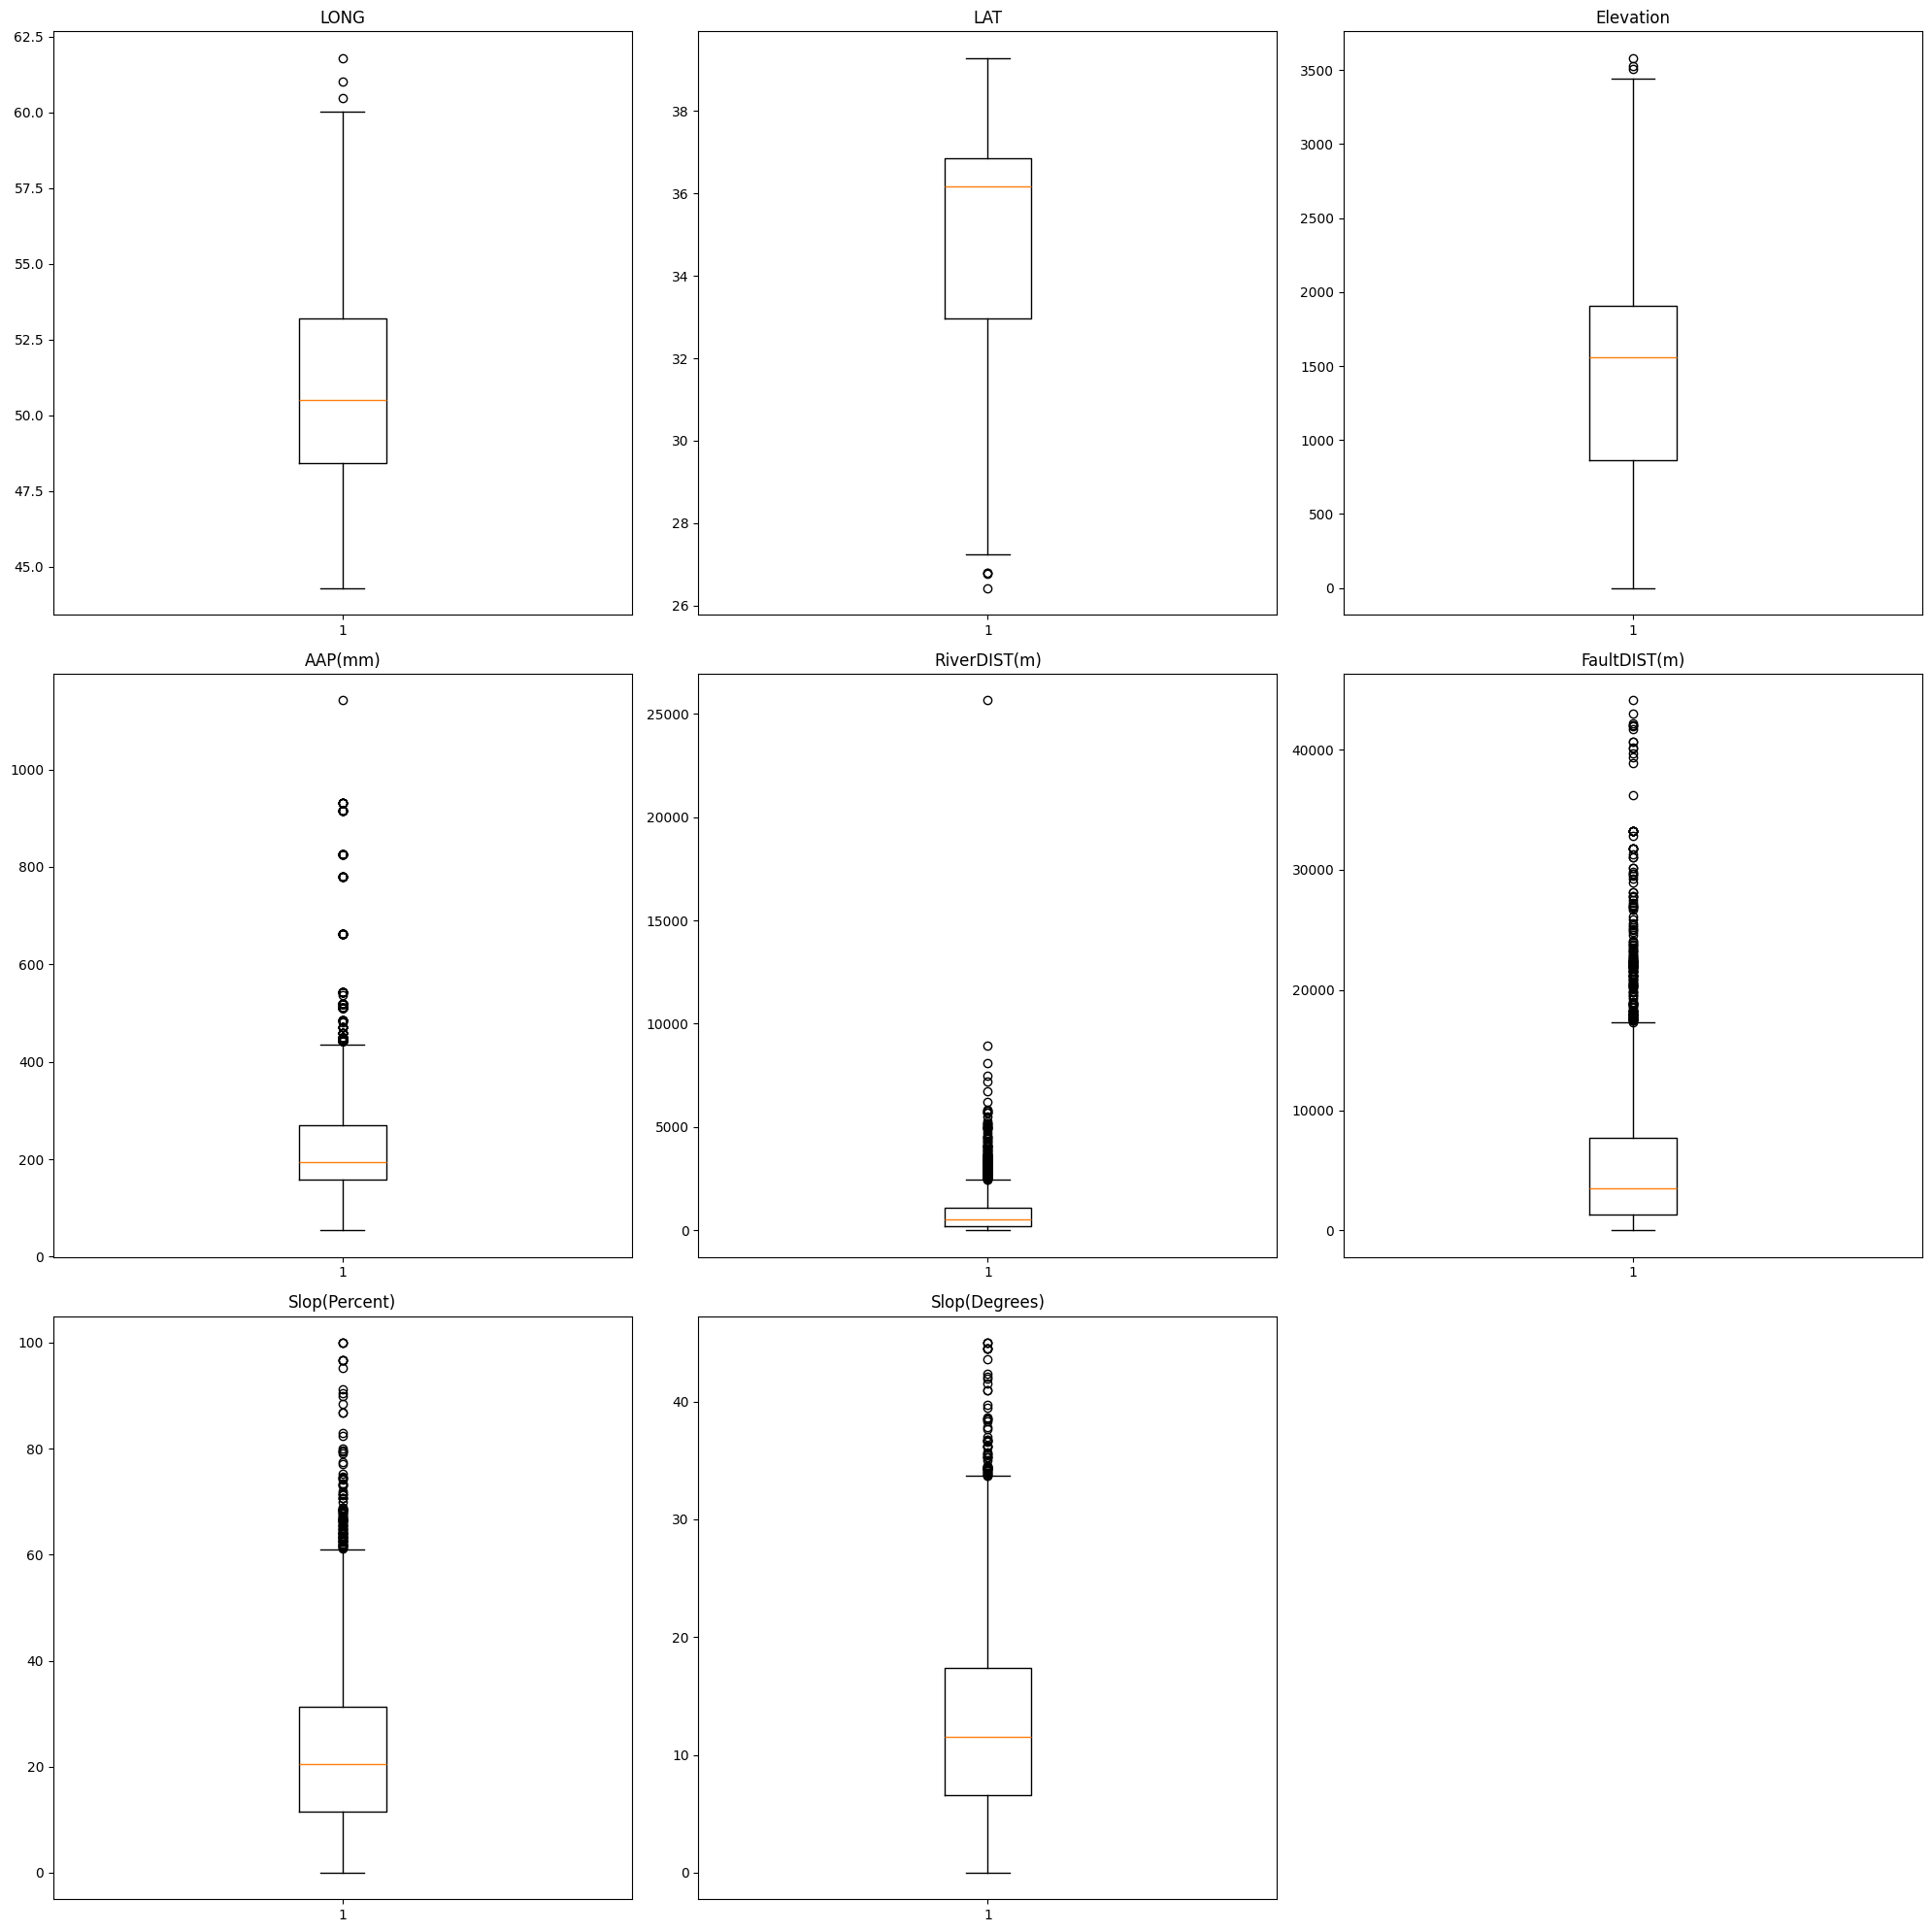

In [11]:
## check for outliers
num_cols = len(continous_variable.columns)
nrows = (num_cols - 1) // 3 + 1
ncols = min(num_cols, 3)

plt.figure(figsize=(20, 20))
for i, col in enumerate(continous_variable.columns):
    plt.subplot(nrows, ncols, i + 1)
    plt.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

>Outliers are seen in the continous columns of the dataframe, With these present they have to be dealt with, I am going going to use the `IQR Method`

In [12]:
def remove_outliers(columns):
    for i in columns:
        lower_quantile = data[i].quantile(0.25)
        upper_quantile = data[i].quantile(0.75)
        IQR = upper_quantile - lower_quantile
        upper_boundary = upper_quantile + 1.5 * IQR
        lower_boundary = upper_quantile - 1.5 * IQR
        data[i] = np.where(
            data[i] > upper_boundary, upper_boundary, data[i]
        )
        data[i] = np.where(
            data[i] < lower_boundary, lower_boundary, data[i]
        )

In [13]:
remove_outliers(continous_variable.columns)

>Visualing the dataframe again to see if the ouliers have been removed

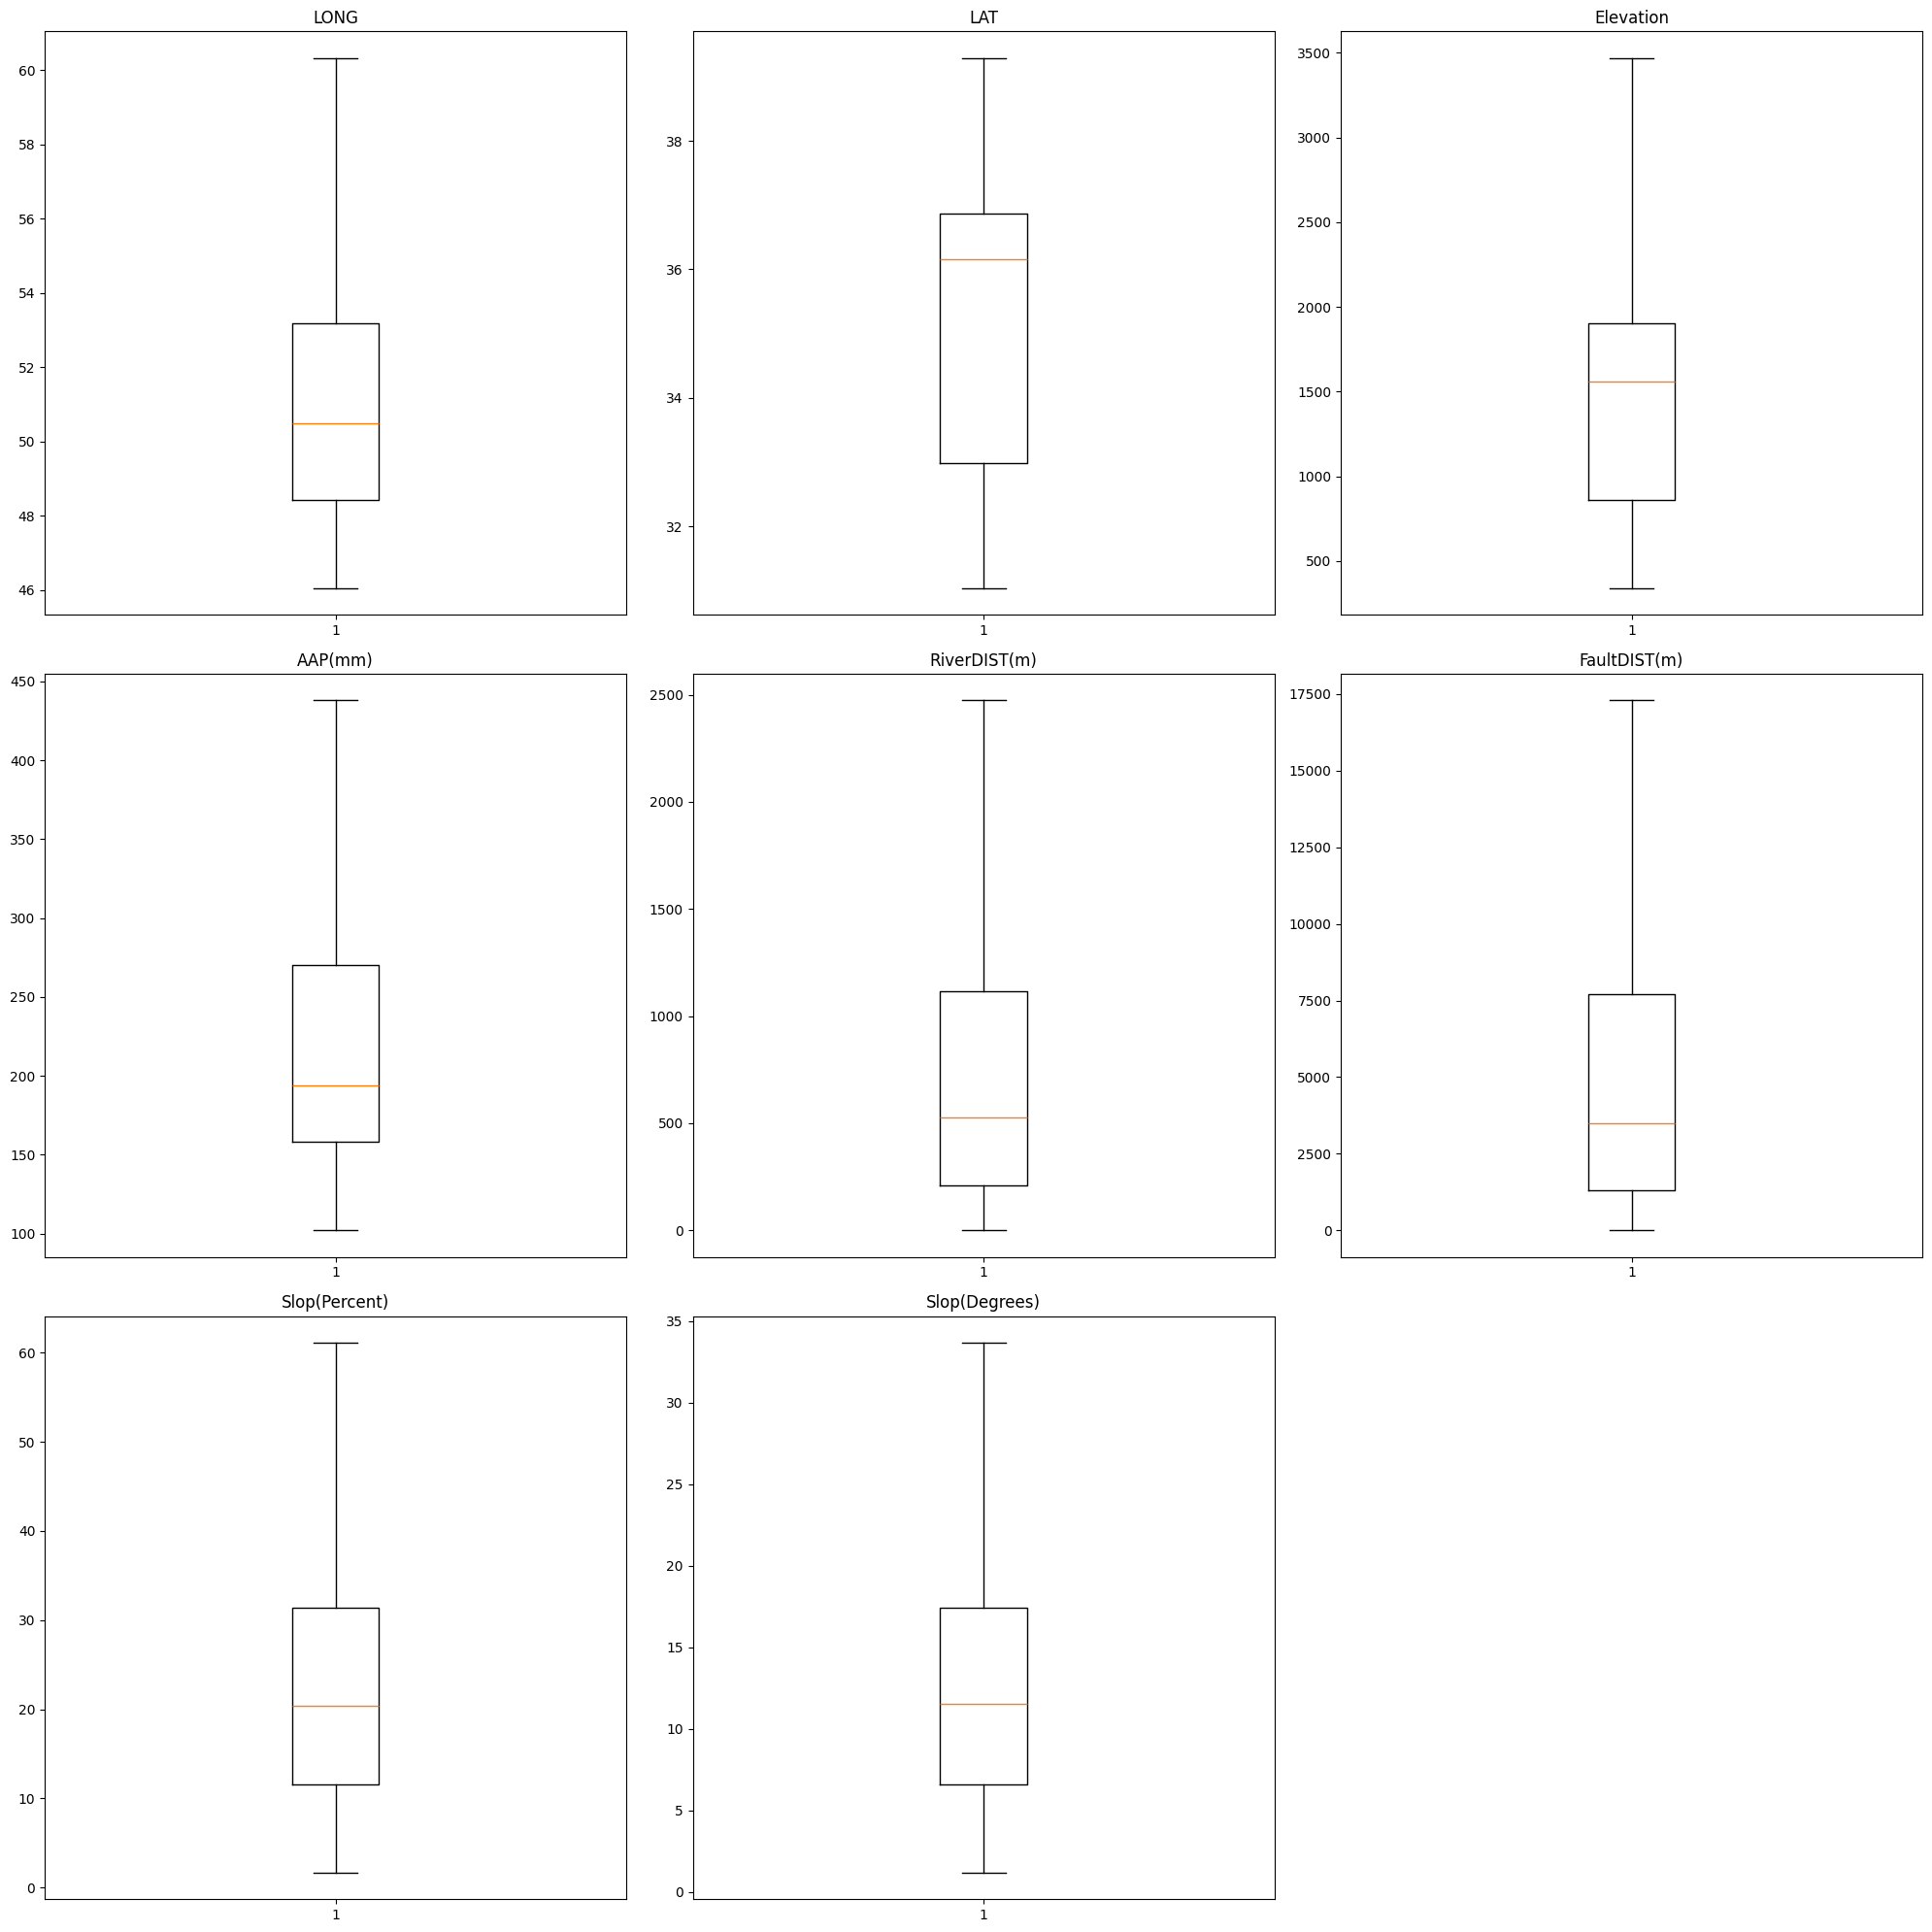

In [14]:
continous_variable = data.select_dtypes(include=['float64','int64'])
num_cols = len(continous_variable.columns)
nrows = (num_cols - 1) // 3 + 1
ncols = min(num_cols, 3)
plt.figure(figsize=(20, 20))
for i, col in enumerate(continous_variable.columns):
    plt.subplot(nrows, ncols, i + 1)
    plt.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

* Removing duplicates in the dataset

In [15]:
#Removing duplicates in the dataset
data = data.drop_duplicates()

## Milestone Two

* Exploring the dataset 

In [16]:
data.head()

,LONG,LAT,SUB_Basin,Elevation,AAP(mm),RiverDIST(m),FaultDIST(m),Landuse_Type,Slop(Percent),Slop(Degrees),GEO_UNIT,DES_GEOUNI,Climate_Type,DES_ClimateType
0,52.326,31.037875,Mehran,617.0,137.0,1448.705292,17291.204064,poorrange,42.240669,22.899523,EOas-ja,"Undivided Asmari and Jahrum Formation , regard...",A-M-VW,"Warm and humid, with a humid period longer tha..."
1,52.333,31.037875,Mehran,944.0,137.0,344.299484,17291.204064,mix(woodland_x),61.142350,33.680277,KEpd-gu,Keewatin Epedotic quartz diorite,A-M-VW,"Warm and humid, with a humid period longer tha..."
3,52.333,31.037875,Mehran,340.0,137.0,1889.828623,17291.204064,rock,12.141766,6.922833,Mlmmi,Low weathering grey marls alternating with ba...,A-M-VW,"Warm and humid, with a humid period longer tha..."
4,52.324,31.037875,Mehran,340.0,137.0,874.201691,17291.204064,poorrange,2.216230,1.269598,MuPlaj,"Brown to grey , calcareous , feature - formin...",A-M-VW,"Warm and humid, with a humid period longer tha..."
5,52.313,31.037875,Mehran,616.0,137.0,404.808953,17291.204064,poorrange,12.935300,7.370455,OMr,Opemiska mafic rocks,A-M-VW,"Warm and humid, with a humid period longer tha..."


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4016 entries, 0 to 4294
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LONG             4016 non-null   float64
 1   LAT              4016 non-null   float64
 2   SUB_Basin        4016 non-null   object 
 3   Elevation        4016 non-null   float64
 4   AAP(mm)          4016 non-null   float64
 5   RiverDIST(m)     4016 non-null   float64
 6   FaultDIST(m)     4016 non-null   float64
 7   Landuse_Type     4016 non-null   object 
 8   Slop(Percent)    4016 non-null   float64
 9   Slop(Degrees)    4016 non-null   float64
 10  GEO_UNIT         4016 non-null   object 
 11  DES_GEOUNI       4016 non-null   object 
 12  Climate_Type     4016 non-null   object 
 13  DES_ClimateType  4016 non-null   object 
dtypes: float64(8), object(6)
memory usage: 470.6+ KB


In [18]:
data.describe(include='all')

,LONG,LAT,SUB_Basin,Elevation,AAP(mm),RiverDIST(m),FaultDIST(m),Landuse_Type,Slop(Percent),Slop(Degrees),GEO_UNIT,DES_GEOUNI,Climate_Type,DES_ClimateType
count,4016.000000,4016.000000,4016,4016.000000,4016.000000,4016.000000,4016.000000,4016,4016.000000,4016.000000,4016,4016,4016,4016
unique,NaN,NaN,63,NaN,NaN,NaN,NaN,36,NaN,NaN,216,203,14,4
top,NaN,NaN,Karun,NaN,NaN,NaN,NaN,modrange,NaN,NaN,Qft2,Low level piedmont fan and valley teraces dep...,SA-K-W,"Hot and dry, with a dry period longer than the..."
freq,NaN,NaN,545,NaN,NaN,NaN,NaN,558,NaN,NaN,308,308,1399,3370
mean,50.989020,35.074703,NaN,1402.327316,229.649651,758.142021,5096.927664,NaN,22.878010,12.665815,NaN,NaN,NaN,NaN
std,3.373413,2.380920,NaN,653.051366,96.604951,690.669772,4813.038146,NaN,14.577533,7.756747,NaN,NaN,NaN,NaN
min,46.051250,31.037875,NaN,340.000000,102.000000,0.065920,1.121601,NaN,1.644564,1.177477,NaN,NaN,NaN,NaN
25%,48.379750,33.048000,NaN,850.000000,159.000000,211.454373,1284.406291,NaN,11.615790,6.625665,NaN,NaN,NaN,NaN
50%,50.486000,36.183500,NaN,1551.500000,194.000000,530.328526,3389.665781,NaN,20.428208,11.545646,NaN,NaN,NaN,NaN
75%,53.204500,36.871250,NaN,1902.000000,270.000000,1126.894301,7660.315191,NaN,31.378355,17.421000,NaN,NaN,NaN,NaN


>Giving a brief explaintion from the content covered in the above milestone


### 1. Finding the effect of Land Use Type on Landslide Occurrence:
 `Research Question:` Does the type of land use influence the occurrence of landslides?

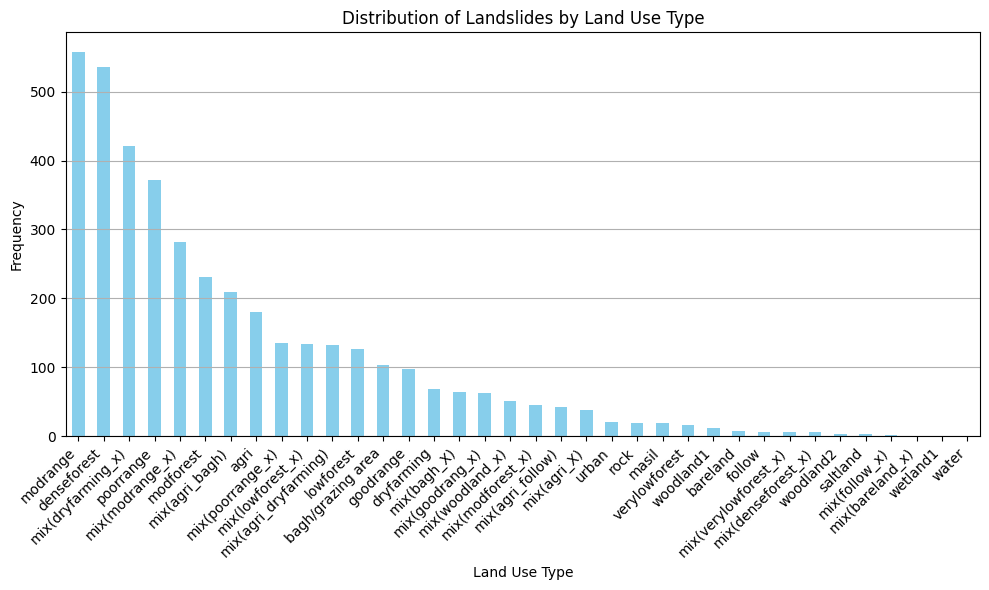

In [19]:
landuse_counts = data['Landuse_Type'].value_counts()

# Visualizing the distribution of landslides across different land use types using a bar plot
plt.figure(figsize=(10, 6))
landuse_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Landslides by Land Use Type')
plt.xlabel('Land Use Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


>Performing a chi-square test to determine if there is a significant difference in landslide occurrence between different land use types.
* `Null Hypothesis (H0)` There is no significant difference in landslide occurrence between land use types.
* `Alternative Hypothesis (H1)` There is a significant difference in landslide occurrence between land use types.

In [20]:
from scipy.stats import chisquare

# Observed frequencies (actual counts) of landslides for each land use type
observed = landuse_counts.values
expected = [sum(observed) / len(observed)] * len(observed)

chi2_stat, p_value = chisquare(observed, expected)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

# Interpreting the results
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in landslide occurrence between land use types.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in landslide occurrence between land use types.")


Chi-square statistic: 7054.860557768924
P-value: 0.0
Reject the null hypothesis: There is a significant difference in landslide occurrence between land use types.


### 2. Relationship between Elevation and Landslide Frequency:
`Research Question` How does elevation affect the frequency of landslides?

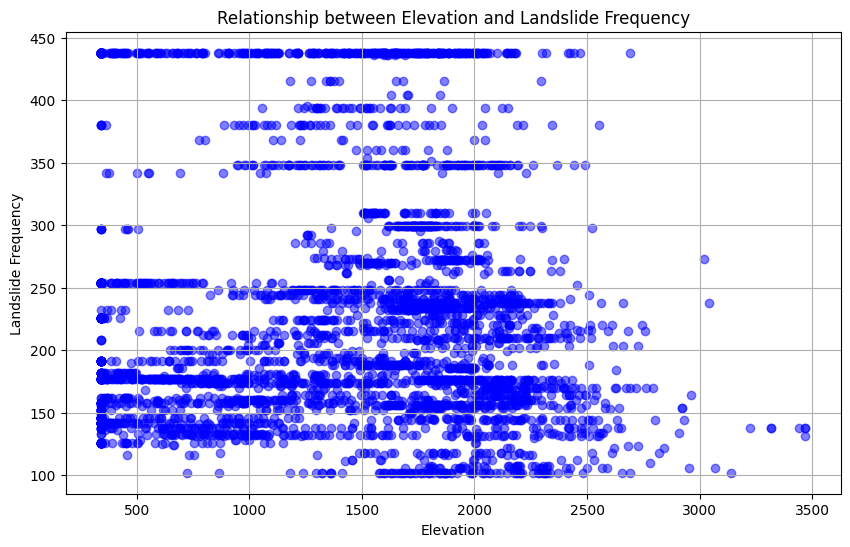

Regression Results:
Slope: -0.006787922017034589
Intercept: 239.16853985600287
R-squared: 0.0021055696057299383
P-value: 0.003631190805875782
Standard Error: 0.0023324140997303144


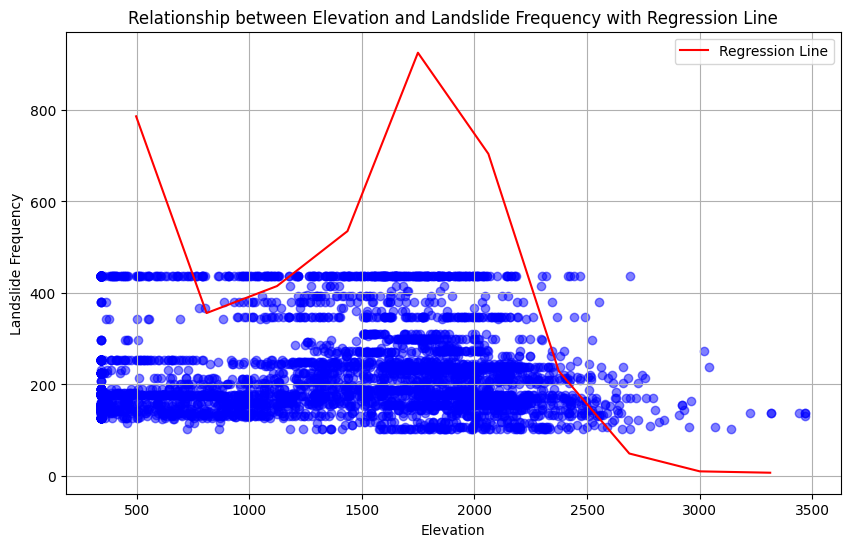

In [21]:
from scipy.stats import linregress
plt.figure(figsize=(10, 6))
plt.scatter(data['Elevation'], data['AAP(mm)'], color='blue', alpha=0.5)
plt.title('Relationship between Elevation and Landslide Frequency')
plt.xlabel('Elevation')
plt.ylabel('Landslide Frequency')
plt.grid(True)
plt.show()

# Dividing elevation into bins and calculate landslide frequency within each bin
num_bins = 10
elevation_bins = np.linspace(data['Elevation'].min(), data['Elevation'].max(), num_bins + 1)
landslide_frequency, _ = np.histogram(data['Elevation'], bins=elevation_bins)
bin_centers = (elevation_bins[:-1] + elevation_bins[1:]) / 2

# Using regression analysis to determine the nature and strength of the relationship
slope, intercept, r_value, p_value, std_err = linregress(data['Elevation'], data['AAP(mm)'])

# Printing regression results
print("Regression Results:")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value ** 2)
print("P-value:", p_value)
print("Standard Error:", std_err)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['Elevation'], data['AAP(mm)'], color='blue', alpha=0.5)
plt.plot(bin_centers, landslide_frequency, color='red', label='Regression Line')
plt.title('Relationship between Elevation and Landslide Frequency with Regression Line')
plt.xlabel('Elevation')
plt.ylabel('Landslide Frequency')
plt.grid(True)
plt.legend()
plt.show()

>Based on the analysis, there is weak evidence to suggest a slightly decreasing trend in landslide frequency with increasing elevation. However, this relationship is very weak, and other factors likely play a more significant role in landslide occurrences.

### 3. Impact of Climate Type on Landslide Risk:
`Research Question` Is there a relationship between climate type and landslide risk?

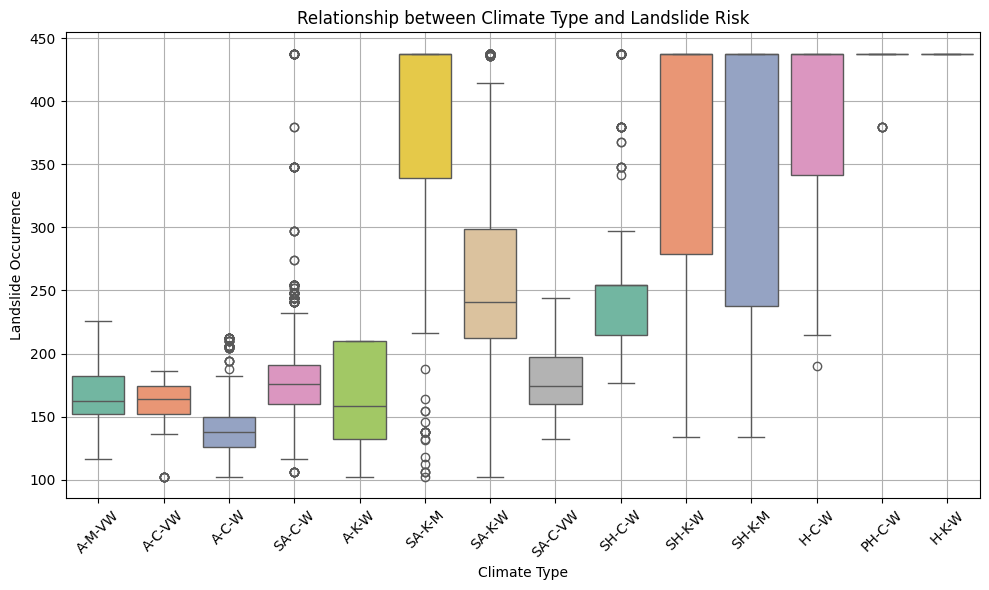

One-way ANOVA results:
F-statistic: 365.2386199421836
P-value: 0.0
Reject the null hypothesis: There are significant differences in landslide occurrence across different climate types.


In [22]:
from scipy.stats import f_oneway
# Grouping the data by 'Climate_Type' and calculating the average landslide occurrence for each climate type
average_landslide_occurrence = data.groupby('Climate_Type')['AAP(mm)'].mean().reset_index()

# Visualizing the relationship between climate type and landslide risk using box plots or violin plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Climate_Type', y='AAP(mm)', data=data, palette='Set2')
plt.title('Relationship between Climate Type and Landslide Risk')
plt.xlabel('Climate Type')
plt.ylabel('Landslide Occurrence')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Conducting hypothesis testing to determine if there are significant differences in landslide occurrence across different climate types ANOVA
climate_types = data['Climate_Type'].unique()
climate_data = [data[data['Climate_Type'] == climate]['AAP(mm)'] for climate in climate_types]

f_statistic, p_value = f_oneway(*climate_data)

print("One-way ANOVA results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in landslide occurrence across different climate types.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in landslide occurrence across different climate types.")

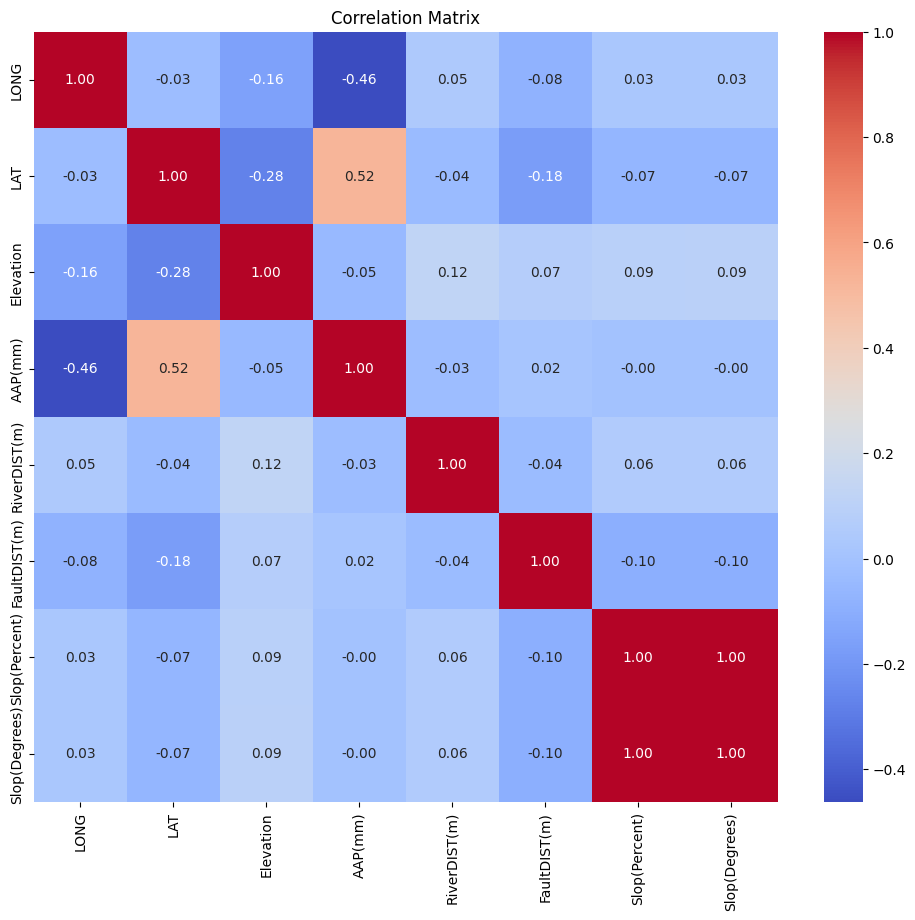

In [23]:
corr_matrix = continous_variable.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

* We define criteria for landslide occurrence based on elevation and precipitation thresholds.
* We label instances based on whether their elevation is above the elevation threshold and precipitation is above the precipitation threshold.
* We add the LandSlide_Occurrence column to the dataset, where instances meeting the criteria are labeled as Yes (landslide occurrence), and others are labeled as No (non-occurrence).

In [26]:
elevation_threshold = 800  # Elevation above this threshold indicates higher risk
precipitation_threshold = 100  # High precipitation indicates higher risk

# Label instances based on criteria
data['LandSlide_Occurrence'] = ((data['Elevation'] > elevation_threshold) & (data['AAP(mm)'] > precipitation_threshold)).map({True: 'Yes', False: 'No'})


In [27]:
def combined_boxplot(var1, var2):
    sns.boxplot(x=data[var1], y=data[var2])
    plt.xlabel(f"{var1}")
    plt.ylabel(f"{var2}")
    plt.title(f"Boxplots of {var1} vs. {var2}")
    plt.show()

In [28]:
def singleAnova(cont_var, cat_var):
    grouped_data = [
        group[cont_var].values for _, group in data.groupby(cat_var)
    ]
    f_statistic, p_value = f_oneway(*grouped_data)

    if p_value > 0.05:
        print(f"{cat_var} is not correlated with {cont_var}")
    else:
        print(f"{cat_var} is correlated with {cont_var}")

In [29]:
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features

Index(['SUB_Basin', 'Landuse_Type', 'GEO_UNIT', 'DES_GEOUNI', 'Climate_Type',
       'DES_ClimateType', 'LandSlide_Occurrence'],
      dtype='object')

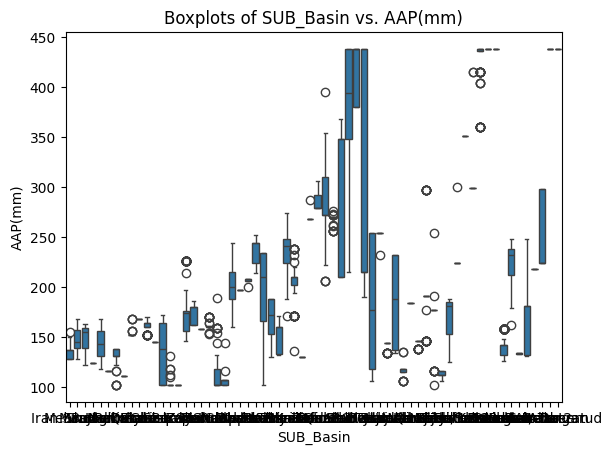

SUB_Basin is correlated with AAP(mm)


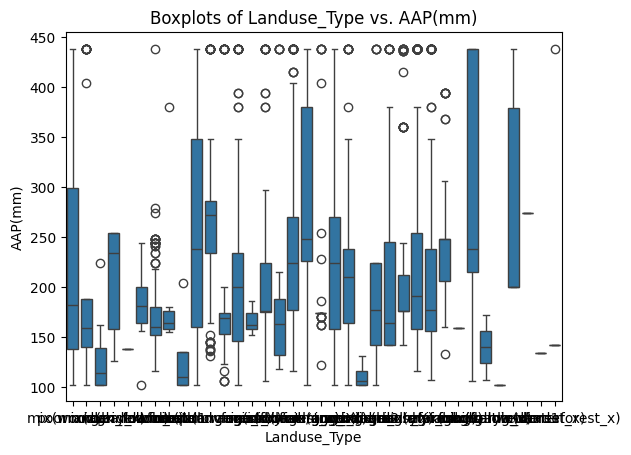

Landuse_Type is correlated with AAP(mm)


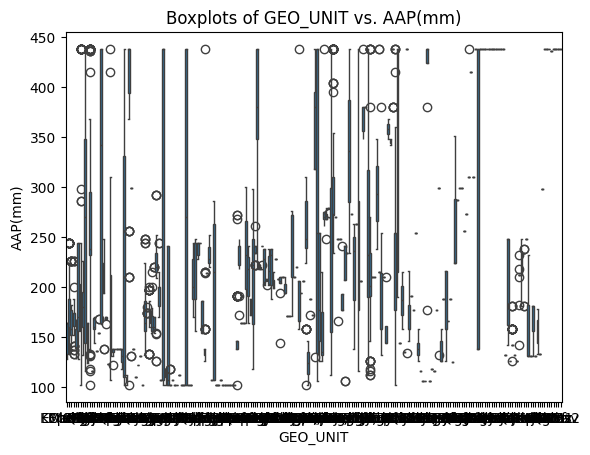

GEO_UNIT is correlated with AAP(mm)


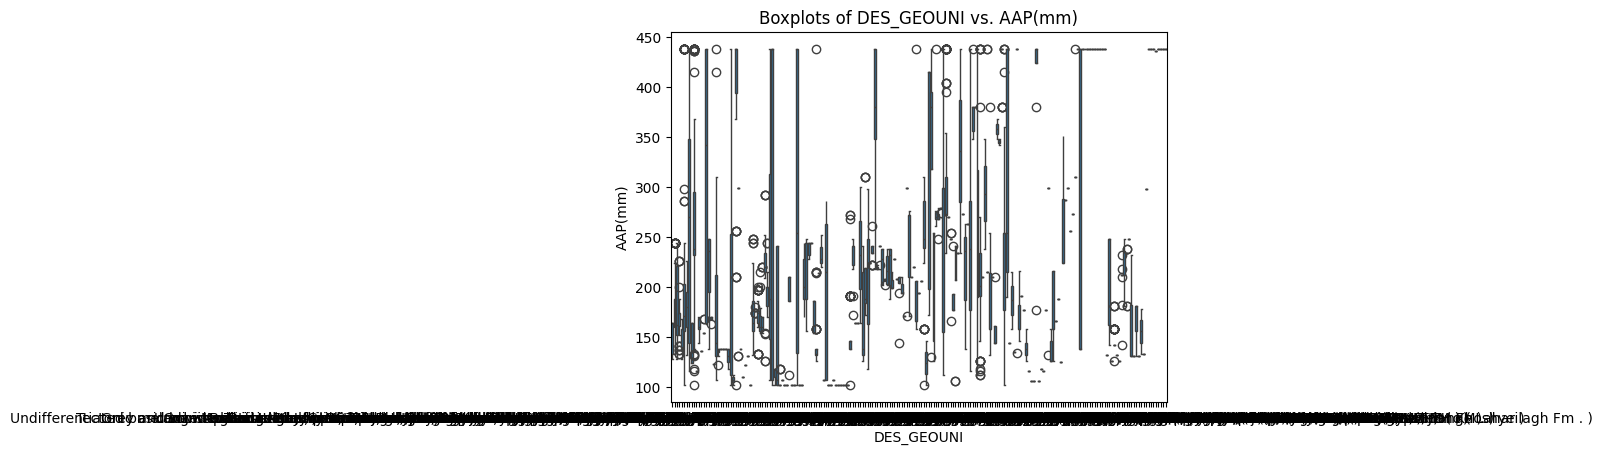

DES_GEOUNI is correlated with AAP(mm)


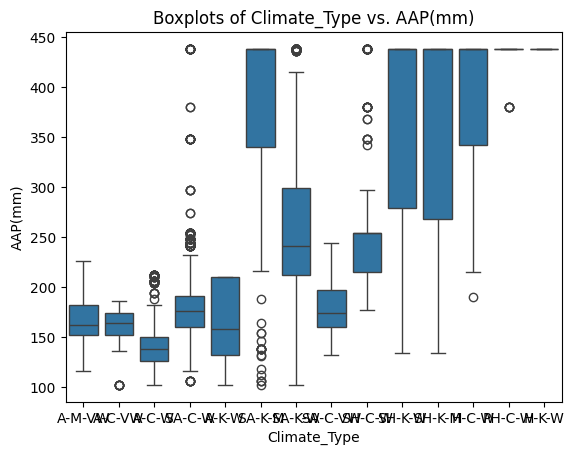

Climate_Type is correlated with AAP(mm)


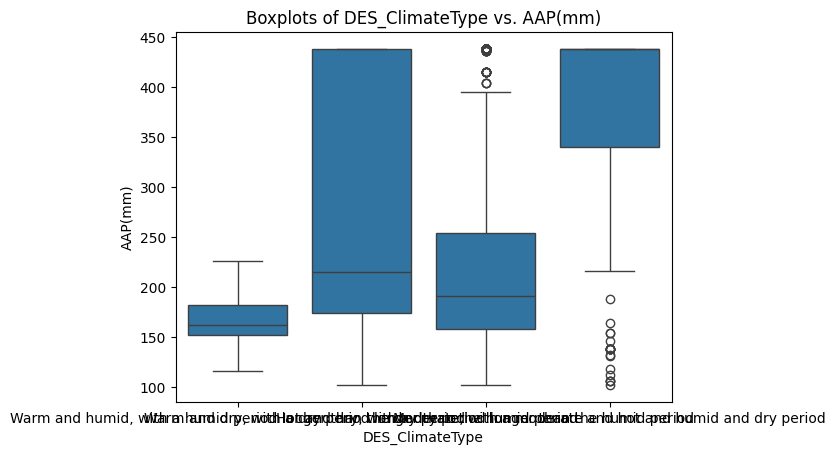

DES_ClimateType is correlated with AAP(mm)


<Figure size 640x480 with 0 Axes>

In [31]:
col1 = "AAP(mm)"
col2 = ['SUB_Basin', 'Landuse_Type', 'GEO_UNIT', 'DES_GEOUNI', 'Climate_Type', 'DES_ClimateType']
for i, col in enumerate(col2):
    if not pd.api.types.is_numeric_dtype(data[col]):
        combined_boxplot(col, col1)
        singleAnova(col1, col)
    elif pd.api.types.is_numeric_dtype(data[col2]):
        print(f"One of the parameters must be categorical")
plt.tight_layout()
plt.show()

Data Transformation

In [32]:
selecteddataset = data[['SUB_Basin', 'Landuse_Type', 'GEO_UNIT', 'DES_GEOUNI', 'Climate_Type', 'DES_ClimateType', 'LONG', 'LAT','AAP(mm)', 'LandSlide_Occurrence']]

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

selecteddataset.loc[:, 'SUB_Basin'] = le.fit_transform(selecteddataset['SUB_Basin'])
selecteddataset.loc[:, 'Landuse_Type'] = le.fit_transform(selecteddataset['Landuse_Type'])
selecteddataset.loc[:, 'GEO_UNIT'] = le.fit_transform(selecteddataset['GEO_UNIT'])
selecteddataset.loc[:, 'DES_GEOUNI'] = le.fit_transform(selecteddataset['DES_GEOUNI'])
selecteddataset.loc[:, 'Climate_Type'] = le.fit_transform(selecteddataset['Climate_Type'])
selecteddataset.loc[:, 'DES_ClimateType'] = le.fit_transform(selecteddataset['DES_ClimateType'])
selecteddataset.head()

,SUB_Basin,Landuse_Type,GEO_UNIT,DES_GEOUNI,Climate_Type,DES_ClimateType,LONG,LAT,AAP(mm),LandSlide_Occurrence
0,32,27,24,188,3,3,52.326,31.06425,137.0,No
1,32,24,76,114,3,3,52.333,31.06425,137.0,Yes
3,32,28,113,30,3,3,52.333,31.06425,137.0,No
4,32,27,116,10,3,3,52.324,31.06425,137.0,No
5,32,27,132,141,3,3,52.313,31.06425,137.0,No


### Model Building

In [35]:
#nessecary libraries for model buildding
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# Intialize my X(Independent variables) and Y (Target variable)
X = selecteddataset.drop(columns=['AAP(mm)', 'LandSlide_Occurrence']) 
y = selecteddataset['LandSlide_Occurrence']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
#intailized the Logistic Regression model to use as model and also fit the training data into the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data using the trained model
y_pred = model.predict(X_test)

# Checking for the Accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8325062034739454
              precision    recall  f1-score   support

          No       0.63      0.51      0.57       172
         Yes       0.87      0.92      0.90       634

    accuracy                           0.83       806
   macro avg       0.75      0.72      0.73       806
weighted avg       0.82      0.83      0.83       806



In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data using the trained model
y_pred_rf = rf_model.predict(X_test)

# Checking for the Accuracy of the model
print("Random Forest Classifier - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classifier - Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier - Accuracy: 0.9640198511166254
Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.90      0.91       172
         Yes       0.97      0.98      0.98       634

    accuracy                           0.96       806
   macro avg       0.95      0.94      0.95       806
weighted avg       0.96      0.96      0.96       806



In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

# Checking for the Accuracy of the model
print("Gradient Boosting Classifier - Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classifier - Classification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classifier - Accuracy: 0.9553349875930521
Gradient Boosting Classifier - Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.89      0.89       172
         Yes       0.97      0.97      0.97       634

    accuracy                           0.96       806
   macro avg       0.94      0.93      0.93       806
weighted avg       0.96      0.96      0.96       806



> I am going to go with `RandomForestClassifier`  since it has the highest accuracy score of  0.9640198511166254